<a href="https://colab.research.google.com/github/AzadMehedi/ML-Algorithoms/blob/main/Polinomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [3]:
# import dataset
url = 'https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-tax-gnp-bd.csv'
df = pd.read_csv(url)
df.head()

,YEAR,GNP,POPULATION,TAX
0,1980,1499.68,82.498,19.400
1,1981,1583.50,84.764,22.500
2,1982,1634.27,87.061,24.400
3,1983,1709.60,89.400,27.000
4,1984,1781.02,91.804,32.265


<AxesSubplot:xlabel='POPULATION', ylabel='GNP'>

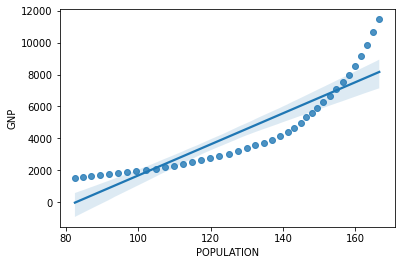

In [10]:
# let's graph a regression plot
sns.regplot(data=df, x=df['POPULATION'], y=df['GNP'])

### Dataset looks like Exponential.
-- need to implement Non Linear/ polinomial Regression 

<AxesSubplot:xlabel='POPULATION', ylabel='GNP'>

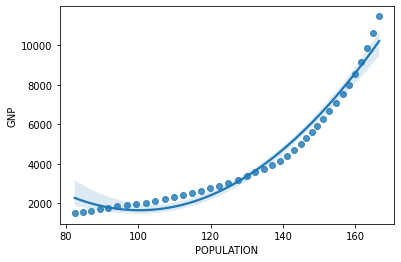

In [14]:
# let's try 2 degree order Polinomial function on dataset
sns.regplot(data=df, x=df['POPULATION'], y=df['GNP'], order=2)

<AxesSubplot:xlabel='POPULATION', ylabel='GNP'>

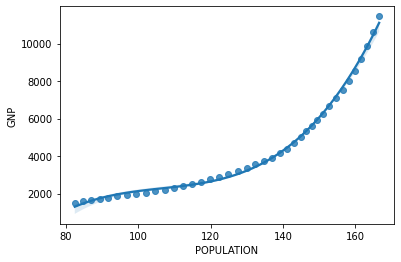

In [15]:
# let's try 2 degree order Polinomial function on dataset
sns.regplot(data=df, x=df['POPULATION'], y=df['GNP'], order=3)

3 Degree Order Polinomial Function is fit the data erfectly in regression line.

# let's transform our data with 3 degree order for polinomial regression

In [23]:
X = df['POPULATION'].values.reshape(-1,1)
y = df['GNP'].values.reshape(-1,1)
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
#  The random state hyperparameter in the train_test_split() function controls the shuffling process.
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures()
X_ = pf.fit_transform(X)
X_test_ = pf.fit_transform(X_test)  

পলিনমিয়াল রিগ্রেশনের জন্য আলাদা কোন ফাংশন নেই। ডেটাকে ট্রান্সফরমেশনের মাধ্যমে পলিনমিয়াল ফিচার সেট করে , লিনিয়ার ফাংশনের মাধ্যমেই পাইথনে পলিনমিয়াল রিগ্রেশন করা হয়। 

In [24]:
poly = LinearRegression()
poly.fit(X_, y)
poly.coef_

array([[   0.        , -391.38077784,    1.95019354]])

In [26]:
# আমাদের মডেল এখন তৈরি। এবার অ্যাকুরেসি চেক করার পালা।
predictions = poly.predict(X_test_)

print('Coefficients: ', poly.coef_)
print('Intercept: ', poly.intercept_)
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = poly.score(X_test_, y_test)
print('Accuracy: ', accuracy*100, '%')

Coefficients:  [[   0.         -391.38077784    1.95019354]]
Intercept:  [21288.19575041]


ValueError: ignored